In [6]:
import numpy as np
import matplotlib.pyplot as plt

Para criar um viga, é preciso instaciar um objeto da classe `Viga`. Seus parâmetros são:

$$ nomeDaViga = Viga(E,I,L,A)$$

- $L$ = Comprimento em metros
- $E$ = Módulo de elasticidade em MPa
- $I$ = Momento de inércia em metros à quarta
- $A$ = Área em m2


In [46]:
# Definir class Viga
class Viga:
    def __init__(self, L = 1, E = 20000, I = 1, A = 1):
        self.E = E
        self.I = I
        self.L = L
        self.A = A
        
        #Matriz de rigidez 
        self.k = E * I / L**3 * np.array([
                [12., 6*L, -12, 6*L],
                [6*L, 4*L**2, -6*L, 2*L**2],
                [-12, -6*L, 12, -6*L],
                [6*L, 2*L**2, -6*L, 4*L**2]
            ])
        
    def __str__(self):
        return ('Comprimento = ' + str(self.L) + " m, \n"
    + 'Inercia = ' + str(self.I) + ' m^4, \n'
    + 'Elasticidade = ' + str(self.E) + ' MPa \n')
        
# Exemplo de criacao de viga
minhaViga1 = Viga() #com valores padroes
minhaViga2 = Viga(2) #com comprimento 2 e resto padrao
minhaViga3 = Viga(2, 25000, 3000000) # Total

Observe que a qualquer momento pode-se obter as informações de cada viga com: `minhaViga.parametro`

In [47]:
#Exemplo
minhaViga2.L #para mostrar o comprimento da `minhaViga2`

2

In [48]:
#Exemplo to STRING
str(minhaViga1)

'Comprimento = 1 m, \nInercia = 1 m^4, \nElasticidade = 20000 MPa \n'

As matrizes de rigidez também estão disponíveis através do comando `minhaViga.k`

In [49]:
#Exemplo
minhaViga3.k #mostrar matriz de rigidez da minhaViga3

array([[  1.12500000e+11,   1.12500000e+11,  -1.12500000e+11,
          1.12500000e+11],
       [  1.12500000e+11,   1.50000000e+11,  -1.12500000e+11,
          7.50000000e+10],
       [ -1.12500000e+11,  -1.12500000e+11,   1.12500000e+11,
         -1.12500000e+11],
       [  1.12500000e+11,   7.50000000e+10,  -1.12500000e+11,
          1.50000000e+11]])

## Apoios

- Tipo 1 = fixo em x (apoiado)
- Tipo 2 = fixo em x e y (fixo)
- Tipo 3 = fixo em x, y e z (engastado)


In [75]:
#Definicao da classe Nó
#Tipo 1 = fixo em x (apoiado)
#Tipo 2 = fixo em x e y (fixo)
#Tipo 3 = fixo em x, y e z (engastado)
class Apoio:
    def __init__(self, x, tipo = 1):
        self.x = x
        self.tipo = tipo
    
    

In [51]:
a = Apoio(0,1)
b = Apoio(3,1)

## Forças concentradas

- Tipo 1 = em x (POSITIVO = ESQUERDA PARA DIREITA)
- Tipo 2 = em y (POSITIVO = CIMA PARA BAIXO) 
- Tipo 3 = em z (momento) (POSITIVO = HORARIO)

In [52]:
class ForcaC:
    def __init__(self, f, x, tipo):
        self.f = f
        self.x = x
        self.tipo = tipo

In [55]:
f1 = ForcaC(10,3,2)

## Forças distribuidas

No momento apenas distribuicoes lineares 
- Tipo 1 = em x (POSITIVO = ESQUERDA PARA DIREITA)
- Tipo 2 = em y (POSITIVO = CIMA PARA BAIXO) 
- Tipo 3 = em z (momento) (POSITIVO = HORARIO) [existe?]

In [53]:
class ForcaD:
    def __init__(self, f_i, f_f, x_i, x_f, tipo):
        self.f_i = f_i
        self.f_f = f_f
        self.x_i = x_i
        self.x_f = x_f
        sef.tipo = tipo

# Estrutura

Agora que temos a viga, os apoios e forças podemos fechar a estrutura e calcular os diagramas

In [85]:
class Eztrut:
    def __init__(self, viga, apoios, cargas):
        self.viga = viga
        self.apoios = apoios
        self.cargas = cargas
        
    
    def estaticidade():
        estaticidade = 0
        for apoio in apoios:
            estacidade+= apoio.tipo

In [84]:

ex1 = Eztrut(minhaViga1, [a,b], f1)
ex1.bacon

'asda'

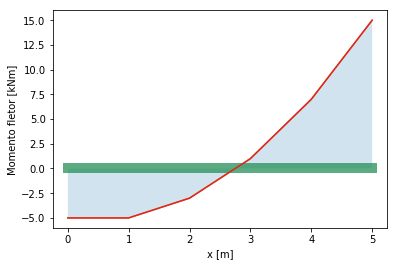

In [145]:
j= range(0,6)
x = []
y = []
for i in j:
    x.append(i)
    y.append(-5 + i**2 - i)

#Preparar graficos para sombrear regiao
xgraf = [0] + x #colocar um zero na primera casa
xgraf.append(5) #colocar o ultimo valor no final do vetor
ygraf = [0] + y
ygraf.append(0)

plt.plot([0,5], [0, 0], linewidth = 10, alpha=0.5)
plt.xlabel('x [m]')
plt.ylabel('Momento fletor [kNm]')
plt.plot(y)
plt.fill(xgraf, ygraf, 'v', alpha=0.2)
plt.show()

In [135]:
ygraf

[0, -5, -5, -3, 1, 7, 15]

In [146]:
Eztrut.estaticidade(ex1)

TypeError: estaticidade() takes 0 positional arguments but 1 was given

In [18]:
import PIL.image
from cStringIO import StringIO
import IPython.display
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

ImportError: No module named 'PIL.image'